In [4]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import nltk 
import re
from textblob import TextBlob
import string
from wordcloud import WordCloud


In [5]:
#reading the data
df=pd.read_csv('Stocks_twitter.csv')
df.head()

Unnamed: 0                       Date             User  \
0           0  2022-06-14 09:17:08+00:00       tradingqna   
1           1  2022-07-09 09:49:07+00:00  santhos89105482   
2           2  2022-07-07 13:10:22+00:00   prasim_swaroop   
3           3  2022-06-30 14:13:54+00:00  Muhamma43728664   
4           4  2022-06-28 05:05:09+00:00     rankajrankaj   

                                               Tweet                  company  \
0  The rights issue of Davangere Sugar Company op...  davangere sugar company   
1  @aswathiguna @mrpandya007 Hi Ashwathi ,can yu ...      xchanging solutions   
2  @Atulsingh_asan Asking u sir 10th time. Please...      xchanging solutions   
3                   @scout_stock Xchanging solutions      xchanging solutions   
4  Xchanging Solutions Limited - Closure of tradi...      xchanging solutions   

   Stock_status  
0             1  
1             1  
2             1  
3             1  
4             1

<AxesSubplot:xlabel='Stock_status', ylabel='count'>

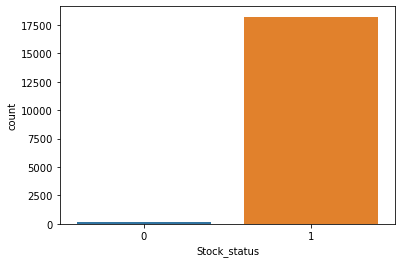

In [7]:
#checking the stock status

sns.countplot(x = 'Stock_status', data = df)


We have a comparitively higher number of tweets for the stocks that are in the gain, top 10 positions

In [8]:
df['Tweet']

0        The rights issue of Davangere Sugar Company op...
1        @aswathiguna @mrpandya007 Hi Ashwathi ,can yu ...
2        @Atulsingh_asan Asking u sir 10th time. Please...
3                         @scout_stock Xchanging solutions
4        Xchanging Solutions Limited - Closure of tradi...
                               ...                        
18341    i can’t wait to get my furniture next week 🥹 h...
18342    50 years ago today CORT got its start, and 50 ...
18343    @TheRealMrsSpit Matching, new, non clearance f...
18344    We are excited to share another milestone with...
18345    New parenting milestone today! Figuring out wh...
Name: Tweet, Length: 18346, dtype: object

In [9]:
#cleaning tweets from common twitter noises


def cleantxt(text):
    text=re.sub(r'@[a-zA-Z0-9]+','',text)#mentions
    text=re.sub(r'#','',text) #hash tags
    text=re.sub(r'RT[\s]+','',text) #retweets

    text=re.sub(r'https?:\/\/\S+','',text)#hyperlinks
    return text



In [10]:
#cleaning texts from emojies

from cleantext import clean
for j in df['Tweet']:
    clean(j, no_emoji=True)

In [11]:
#applying re on tweets

df['Tweet']=df['Tweet'].apply(cleantxt)

In [12]:
#cleaning punctualations

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['Tweet'].apply(lambda x: remove_punct(x))
df.head(10)

Unnamed: 0                       Date             User  \
0           0  2022-06-14 09:17:08+00:00       tradingqna   
1           1  2022-07-09 09:49:07+00:00  santhos89105482   
2           2  2022-07-07 13:10:22+00:00   prasim_swaroop   
3           3  2022-06-30 14:13:54+00:00  Muhamma43728664   
4           4  2022-06-28 05:05:09+00:00     rankajrankaj   
5           5  2022-06-27 12:02:18+00:00    im_prashanth_   
6           6  2022-06-29 06:34:07+00:00     rankajrankaj   
7           7  2022-07-11 21:09:38+00:00        jezaki999   
8           8  2022-07-11 14:25:41+00:00           yaeixi   
9           9  2022-07-11 14:13:53+00:00        parlegreg   

                                               Tweet                  company  \
0  The rights issue of Davangere Sugar Company op...  davangere sugar company   
1    Hi Ashwathi ,can yu tell on India bulls hous...      xchanging solutions   
2  _asan Asking u sir 10th time. Please reply.  H...      xchanging solutions   
3                         _stock Xchanging solutions      xchanging solutions   
4  Xchanging Solutions Limited - Closure of tradi...      xchanging solutions   
5           Xchanging Solutions \n ma'am \nAf CMP???      xchanging solutions   
6  BGR Energy Systems Limited - Closure of tradin...       bgr energy systems   
7  11. Thomas. He Was stabbed with a spear in Ind...                aki india   
8                          _nini im from india !! :D                aki india   
9                  it's actually monsoon in India rn                aki india   

   Stock_status                                        Tweet_punct  
0             1  The rights issue of Davangere Sugar Company op...  
1             1    Hi Ashwathi can yu tell on India bulls hous ...  
2             1  asan Asking u sir th time Please reply  How do...  
3             1                          stock Xchanging solutions  
4             1  Xchanging Solutions Limited  Closure of tradin...  
5             1               Xchanging Solutions \n maam \nAf CMP  
6             1  BGR Energy Systems Limited  Closure of trading...  
7             1   Thomas He Was stabbed with a spear in India d...  
8             1                              nini im from india  D  
9             1                   its actually monsoon in India rn

In [13]:
#Tokenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

Unnamed: 0                       Date             User  \
0           0  2022-06-14 09:17:08+00:00       tradingqna   
1           1  2022-07-09 09:49:07+00:00  santhos89105482   
2           2  2022-07-07 13:10:22+00:00   prasim_swaroop   
3           3  2022-06-30 14:13:54+00:00  Muhamma43728664   
4           4  2022-06-28 05:05:09+00:00     rankajrankaj   

                                               Tweet                  company  \
0  The rights issue of Davangere Sugar Company op...  davangere sugar company   
1    Hi Ashwathi ,can yu tell on India bulls hous...      xchanging solutions   
2  _asan Asking u sir 10th time. Please reply.  H...      xchanging solutions   
3                         _stock Xchanging solutions      xchanging solutions   
4  Xchanging Solutions Limited - Closure of tradi...      xchanging solutions   

   Stock_status                                        Tweet_punct  \
0             1  The rights issue of Davangere Sugar Company op...   
1             1    Hi Ashwathi can yu tell on India bulls hous ...   
2             1  asan Asking u sir th time Please reply  How do...   
3             1                          stock Xchanging solutions   
4             1  Xchanging Solutions Limited  Closure of tradin...   

                                     Tweet_tokenized  
0  [the, rights, issue, of, davangere, sugar, com...  
1  [, hi, ashwathi, can, yu, tell, on, india, bul...  
2  [asan, asking, u, sir, th, time, please, reply...  
3                      [stock, xchanging, solutions]  
4  [xchanging, solutions, limited, closure, of, t...

In [14]:
#removing Stop words

stopword = nltk.corpus.stopwords.words('english')


def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_clean'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)


Unnamed: 0                       Date             User  \
0           0  2022-06-14 09:17:08+00:00       tradingqna   
1           1  2022-07-09 09:49:07+00:00  santhos89105482   
2           2  2022-07-07 13:10:22+00:00   prasim_swaroop   
3           3  2022-06-30 14:13:54+00:00  Muhamma43728664   
4           4  2022-06-28 05:05:09+00:00     rankajrankaj   
5           5  2022-06-27 12:02:18+00:00    im_prashanth_   
6           6  2022-06-29 06:34:07+00:00     rankajrankaj   
7           7  2022-07-11 21:09:38+00:00        jezaki999   
8           8  2022-07-11 14:25:41+00:00           yaeixi   
9           9  2022-07-11 14:13:53+00:00        parlegreg   

                                               Tweet                  company  \
0  The rights issue of Davangere Sugar Company op...  davangere sugar company   
1    Hi Ashwathi ,can yu tell on India bulls hous...      xchanging solutions   
2  _asan Asking u sir 10th time. Please reply.  H...      xchanging solutions   
3                         _stock Xchanging solutions      xchanging solutions   
4  Xchanging Solutions Limited - Closure of tradi...      xchanging solutions   
5           Xchanging Solutions \n ma'am \nAf CMP???      xchanging solutions   
6  BGR Energy Systems Limited - Closure of tradin...       bgr energy systems   
7  11. Thomas. He Was stabbed with a spear in Ind...                aki india   
8                          _nini im from india !! :D                aki india   
9                  it's actually monsoon in India rn                aki india   

   Stock_status                                        Tweet_punct  \
0             1  The rights issue of Davangere Sugar Company op...   
1             1    Hi Ashwathi can yu tell on India bulls hous ...   
2             1  asan Asking u sir th time Please reply  How do...   
3             1                          stock Xchanging solutions   
4             1  Xchanging Solutions Limited  Closure of tradin...   
5             1               Xchanging Solutions \n maam \nAf CMP   
6             1  BGR Energy Systems Limited  Closure of trading...   
7             1   Thomas He Was stabbed with a spear in India d...   
8             1                              nini im from india  D   
9             1                   its actually monsoon in India rn   

                                     Tweet_tokenized  \
0  [the, rights, issue, of, davangere, sugar, com...   
1  [, hi, ashwathi, can, yu, tell, on, india, bul...   
2  [asan, asking, u, sir, th, time, please, reply...   
3                      [stock, xchanging, solutions]   
4  [xchanging, solutions, limited, closure, of, t...   
5              [xchanging, solutions, maam, af, cmp]   
6  [bgr, energy, systems, limited, closure, of, t...   
7  [, thomas, he, was, stabbed, with, a, spear, i...   
8                         [nini, im, from, india, d]   
9          [, its, actually, monsoon, in, india, rn]   

                                         Tweet_clean  
0  [rights, issue, davangere, sugar, company, ope...  
1  [, hi, ashwathi, yu, tell, india, bulls, hous,...  
2  [asan, asking, u, sir, th, time, please, reply...  
3                      [stock, xchanging, solutions]  
4  [xchanging, solutions, limited, closure, tradi...  
5              [xchanging, solutions, maam, af, cmp]  
6  [bgr, energy, systems, limited, closure, tradi...  
7  [, thomas, stabbed, spear, india, one, mission...  
8                                  [nini, im, india]  
9                   [, actually, monsoon, india, rn]

In [15]:
df.shape

(18346, 9)

In [16]:
df['Tweet'] #cleaned text

0        The rights issue of Davangere Sugar Company op...
1          Hi Ashwathi ,can yu tell on India bulls hous...
2        _asan Asking u sir 10th time. Please reply.  H...
3                               _stock Xchanging solutions
4        Xchanging Solutions Limited - Closure of tradi...
                               ...                        
18341    i can’t wait to get my furniture next week 🥹 h...
18342    50 years ago today COgot its start, and 50 yea...
18343     Matching, new, non clearance furniture? Girl,...
18344    We are excited to share another milestone with...
18345    New parenting milestone today! Figuring out wh...
Name: Tweet, Length: 18346, dtype: object

In [17]:
#getting subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text). sentiment.subjectivity



#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity



#Create two new columns

df ["Subjectivity"]=df['Tweet_punct'].apply(getSubjectivity)
df ['Polarity'] = df['Tweet_punct'].apply(getPolarity)


In [18]:
df

Unnamed: 0                       Date             User  \
0               0  2022-06-14 09:17:08+00:00       tradingqna   
1               1  2022-07-09 09:49:07+00:00  santhos89105482   
2               2  2022-07-07 13:10:22+00:00   prasim_swaroop   
3               3  2022-06-30 14:13:54+00:00  Muhamma43728664   
4               4  2022-06-28 05:05:09+00:00     rankajrankaj   
...           ...                        ...              ...   
18341         129  2022-06-06 21:18:51+00:00          kaymtay   
18342         130  2022-06-06 13:00:11+00:00    CORTFurniture   
18343         131  2022-06-06 10:44:24+00:00   EarthMother921   
18344         132  2022-06-04 10:23:34+00:00     amandaamici_   
18345         133  2022-06-03 00:21:58+00:00      AnnieDrinks   

                                                   Tweet  \
0      The rights issue of Davangere Sugar Company op...   
1        Hi Ashwathi ,can yu tell on India bulls hous...   
2      _asan Asking u sir 10th time. Please reply.  H...   
3                             _stock Xchanging solutions   
4      Xchanging Solutions Limited - Closure of tradi...   
...                                                  ...   
18341  i can’t wait to get my furniture next week 🥹 h...   
18342  50 years ago today COgot its start, and 50 yea...   
18343   Matching, new, non clearance furniture? Girl,...   
18344  We are excited to share another milestone with...   
18345  New parenting milestone today! Figuring out wh...   

                       company  Stock_status  \
0      davangere sugar company             1   
1          xchanging solutions             1   
2          xchanging solutions             1   
3          xchanging solutions             1   
4          xchanging solutions             1   
...                        ...           ...   
18341      milestone furniture             0   
18342      milestone furniture             0   
18343      milestone furniture             0   
18344      milestone furniture             0   
18345      milestone furniture             0   

                                             Tweet_punct  \
0      The rights issue of Davangere Sugar Company op...   
1        Hi Ashwathi can yu tell on India bulls hous ...   
2      asan Asking u sir th time Please reply  How do...   
3                              stock Xchanging solutions   
4      Xchanging Solutions Limited  Closure of tradin...   
...                                                  ...   
18341  i can’t wait to get my furniture next week 🥹 h...   
18342   years ago today COgot its start and  years la...   
18343   Matching new non clearance furniture Girl you...   
18344  We are excited to share another milestone with...   
18345  New parenting milestone today Figuring out whi...   

                                         Tweet_tokenized  \
0      [the, rights, issue, of, davangere, sugar, com...   
1      [, hi, ashwathi, can, yu, tell, on, india, bul...   
2      [asan, asking, u, sir, th, time, please, reply...   
3                          [stock, xchanging, solutions]   
4      [xchanging, solutions, limited, closure, of, t...   
...                                                  ...   
18341  [i, can, t, wait, to, get, my, furniture, next...   
18342  [, years, ago, today, cogot, its, start, and, ...   
18343  [, matching, new, non, clearance, furniture, g...   
18344  [we, are, excited, to, share, another, milesto...   
18345  [new, parenting, milestone, today, figuring, o...   

                                             Tweet_clean  Subjectivity  \
0      [rights, issue, davangere, sugar, company, ope...      0.000000   
1      [, hi, ashwathi, yu, tell, india, bulls, hous,...      0.000000   
2      [asan, asking, u, sir, th, time, please, reply...      0.900000   
3                          [stock, xchanging, solutions]      0.000000   
4      [xchanging, solutions, limited, closure, tradi...      0.142857   
...                                       

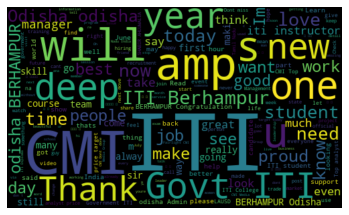

In [19]:

#Plot The Word Cloud


allwords=' '.join([twts for twts in df['Tweet_punct']])





wordCloud = WordCloud(width=500, height=300,random_state=21, max_font_size=119).generate(allwords)



plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')

plt.show()

The current state of word cloud, with the most repeated words in the entire tweets

In [20]:
df

Unnamed: 0                       Date             User  \
0               0  2022-06-14 09:17:08+00:00       tradingqna   
1               1  2022-07-09 09:49:07+00:00  santhos89105482   
2               2  2022-07-07 13:10:22+00:00   prasim_swaroop   
3               3  2022-06-30 14:13:54+00:00  Muhamma43728664   
4               4  2022-06-28 05:05:09+00:00     rankajrankaj   
...           ...                        ...              ...   
18341         129  2022-06-06 21:18:51+00:00          kaymtay   
18342         130  2022-06-06 13:00:11+00:00    CORTFurniture   
18343         131  2022-06-06 10:44:24+00:00   EarthMother921   
18344         132  2022-06-04 10:23:34+00:00     amandaamici_   
18345         133  2022-06-03 00:21:58+00:00      AnnieDrinks   

                                                   Tweet  \
0      The rights issue of Davangere Sugar Company op...   
1        Hi Ashwathi ,can yu tell on India bulls hous...   
2      _asan Asking u sir 10th time. Please reply.  H...   
3                             _stock Xchanging solutions   
4      Xchanging Solutions Limited - Closure of tradi...   
...                                                  ...   
18341  i can’t wait to get my furniture next week 🥹 h...   
18342  50 years ago today COgot its start, and 50 yea...   
18343   Matching, new, non clearance furniture? Girl,...   
18344  We are excited to share another milestone with...   
18345  New parenting milestone today! Figuring out wh...   

                       company  Stock_status  \
0      davangere sugar company             1   
1          xchanging solutions             1   
2          xchanging solutions             1   
3          xchanging solutions             1   
4          xchanging solutions             1   
...                        ...           ...   
18341      milestone furniture             0   
18342      milestone furniture             0   
18343      milestone furniture             0   
18344      milestone furniture             0   
18345      milestone furniture             0   

                                             Tweet_punct  \
0      The rights issue of Davangere Sugar Company op...   
1        Hi Ashwathi can yu tell on India bulls hous ...   
2      asan Asking u sir th time Please reply  How do...   
3                              stock Xchanging solutions   
4      Xchanging Solutions Limited  Closure of tradin...   
...                                                  ...   
18341  i can’t wait to get my furniture next week 🥹 h...   
18342   years ago today COgot its start and  years la...   
18343   Matching new non clearance furniture Girl you...   
18344  We are excited to share another milestone with...   
18345  New parenting milestone today Figuring out whi...   

                                         Tweet_tokenized  \
0      [the, rights, issue, of, davangere, sugar, com...   
1      [, hi, ashwathi, can, yu, tell, on, india, bul...   
2      [asan, asking, u, sir, th, time, please, reply...   
3                          [stock, xchanging, solutions]   
4      [xchanging, solutions, limited, closure, of, t...   
...                                                  ...   
18341  [i, can, t, wait, to, get, my, furniture, next...   
18342  [, years, ago, today, cogot, its, start, and, ...   
18343  [, matching, new, non, clearance, furniture, g...   
18344  [we, are, excited, to, share, another, milesto...   
18345  [new, parenting, milestone, today, figuring, o...   

                                             Tweet_clean  Subjectivity  \
0      [rights, issue, davangere, sugar, company, ope...      0.000000   
1      [, hi, ashwathi, yu, tell, india, bulls, hous,...      0.000000   
2      [asan, asking, u, sir, th, time, please, reply...      0.900000   
3                          [stock, xchanging, solutions]      0.000000   
4      [xchanging, solutions, limited, closure, tradi...      0.142857   
...                                       

In [21]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"


df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

Unnamed: 0                       Date             User  \
0               0  2022-06-14 09:17:08+00:00       tradingqna   
1               1  2022-07-09 09:49:07+00:00  santhos89105482   
2               2  2022-07-07 13:10:22+00:00   prasim_swaroop   
3               3  2022-06-30 14:13:54+00:00  Muhamma43728664   
4               4  2022-06-28 05:05:09+00:00     rankajrankaj   
...           ...                        ...              ...   
18341         129  2022-06-06 21:18:51+00:00          kaymtay   
18342         130  2022-06-06 13:00:11+00:00    CORTFurniture   
18343         131  2022-06-06 10:44:24+00:00   EarthMother921   
18344         132  2022-06-04 10:23:34+00:00     amandaamici_   
18345         133  2022-06-03 00:21:58+00:00      AnnieDrinks   

                                                   Tweet  \
0      The rights issue of Davangere Sugar Company op...   
1        Hi Ashwathi ,can yu tell on India bulls hous...   
2      _asan Asking u sir 10th time. Please reply.  H...   
3                             _stock Xchanging solutions   
4      Xchanging Solutions Limited - Closure of tradi...   
...                                                  ...   
18341  i can’t wait to get my furniture next week 🥹 h...   
18342  50 years ago today COgot its start, and 50 yea...   
18343   Matching, new, non clearance furniture? Girl,...   
18344  We are excited to share another milestone with...   
18345  New parenting milestone today! Figuring out wh...   

                       company  Stock_status  \
0      davangere sugar company             1   
1          xchanging solutions             1   
2          xchanging solutions             1   
3          xchanging solutions             1   
4          xchanging solutions             1   
...                        ...           ...   
18341      milestone furniture             0   
18342      milestone furniture             0   
18343      milestone furniture             0   
18344      milestone furniture             0   
18345      milestone furniture             0   

                                             Tweet_punct  \
0      The rights issue of Davangere Sugar Company op...   
1        Hi Ashwathi can yu tell on India bulls hous ...   
2      asan Asking u sir th time Please reply  How do...   
3                              stock Xchanging solutions   
4      Xchanging Solutions Limited  Closure of tradin...   
...                                                  ...   
18341  i can’t wait to get my furniture next week 🥹 h...   
18342   years ago today COgot its start and  years la...   
18343   Matching new non clearance furniture Girl you...   
18344  We are excited to share another milestone with...   
18345  New parenting milestone today Figuring out whi...   

                                         Tweet_tokenized  \
0      [the, rights, issue, of, davangere, sugar, com...   
1      [, hi, ashwathi, can, yu, tell, on, india, bul...   
2      [asan, asking, u, sir, th, time, please, reply...   
3                          [stock, xchanging, solutions]   
4      [xchanging, solutions, limited, closure, of, t...   
...                                                  ...   
18341  [i, can, t, wait, to, get, my, furniture, next...   
18342  [, years, ago, today, cogot, its, start, and, ...   
18343  [, matching, new, non, clearance, furniture, g...   
18344  [we, are, excited, to, share, another, milesto...   
18345  [new, parenting, milestone, today, figuring, o...   

                                             Tweet_clean  Subjectivity  \
0      [rights, issue, davangere, sugar, company, ope...      0.000000   
1      [, hi, ashwathi, yu, tell, india, bulls, hous,...      0.000000   
2      [asan, asking, u, sir, th, time, please, reply...      0.900000   
3                          [stock, xchanging, solutions]      0.000000   
4      [xchanging, solutions, limited, closure, tradi...      0.142857   
...                                       

In [22]:
# Print all of the positive tweets
sortedDF=df.sort_values(by=['Polarity'])

for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(sortedDF['Tweet'][i])
        print()

_asan Asking u sir 10th time. Please reply.  How do u see xchanging solutions from here. Should hold or sell in huge loss?

_007Club  He's in some form of psychological rut, just observe his body language. There's no FIRE in him..BUT tht liability is costing India, he's taken the place of HOODA who's in great form, and also many other youngsters who are eager to come in and play.. yeh bas lagaa hai.

_od exactly them mfers dont even know countries like india and Bangladesh r inside asia so why r they fking with a majority poc fandom 💀💀

AKI India Ltd - 542020 - Intimation Of Record Date For Issue Of Bonus Equity Shares. Full Details : 

stemlearning's Mini science Centre exhibits are being used by AKI School, Ghatkopar, mumbai with the support of Otis as part of their Corporate Social Responsibility in India (CSR).


teachers study elearning activies principal  minisciencecenter 

   Well done on 370, but there are 370 other issues which are pending most notably jobs and economy please

In [23]:
# Print all of the positive tweets
sortedDF=df.sort_values(by=['Polarity'],ascending=False)


for j in range(0,sortedDF.shape[0]):

    if(sortedDF['Analysis'][j]=='Negative'):

        print(df[['Tweet','company']])

                                                   Tweet  \
0      The rights issue of Davangere Sugar Company op...   
1        Hi Ashwathi ,can yu tell on India bulls hous...   
2      _asan Asking u sir 10th time. Please reply.  H...   
3                             _stock Xchanging solutions   
4      Xchanging Solutions Limited - Closure of tradi...   
...                                                  ...   
18341  i can’t wait to get my furniture next week 🥹 h...   
18342  50 years ago today COgot its start, and 50 yea...   
18343   Matching, new, non clearance furniture? Girl,...   
18344  We are excited to share another milestone with...   
18345  New parenting milestone today! Figuring out wh...   

                       company  
0      davangere sugar company  
1          xchanging solutions  
2          xchanging solutions  
3          xchanging solutions  
4          xchanging solutions  
...                        ...  
18341      milestone furniture  
18342      mile

In [24]:
sortedDF

Unnamed: 0                       Date             User  \
3040         3040  2022-06-14 02:01:32+00:00        TxMom2017   
16491       16491  2022-06-07 05:20:52+00:00         pamu_iti   
13077       13077  2022-06-17 05:57:45+00:00        keti_raju   
14782       14782  2022-06-13 08:38:10+00:00      SanjuSabar7   
13842       13842  2022-06-16 03:30:30+00:00  ajayabhehera143   
...           ...                        ...              ...   
4832         4832  2022-07-10 08:09:47+00:00        malek_iti   
4523         4523  2022-07-11 07:11:26+00:00        BossMnstr   
4342         4342  2022-07-11 14:02:38+00:00         Iti_deep   
4957         4957  2022-07-09 22:33:01+00:00          rexuIti   
7556         7556  2022-07-03 21:28:13+00:00      keyspamming   

                                                   Tweet company  \
3040        _eisd _sanantonio   This is awesome 👏🏻… 🫶🏻🐾🐾     cmi   
16491               Awesome! Congratulations to you both     iti   
13077   Tyre art park is one of the best park of iti ...     iti   
14782   _BERHAMPUR _Odisha _Odisha _odisha  _Admin   ...     iti   
13842                    The best iti govt iti Berhampur     iti   
...                                                  ...     ...   
4832                                      Worst service      iti   
4523    If there’s no og Dragon Ball content in itI’l...     iti   
4342   _tisha 😭😭😭okiee\n\nI was just giving contents ...     iti   
4957   There is nothing to fear when there is two aga...     iti   
7556                          i think i have gone insane     iti   

       Stock_status                                        Tweet_punct  \
3040              1         eisd sanantonio   This is awesome 👏🏻… 🫶🏻🐾🐾   
16491             1                Awesome Congratulations to you both   
13077             1   Tyre art park is one of the best park of iti ...   
14782             1   BERHAMPUR Odisha Odisha odisha  Admin   Berha...   
13842             1                    The best iti govt iti Berhampur   
...             ...                                                ...   
4832              1                                     Worst service    
4523              1   If there’s no og Dragon Ball content in itI’l...   
4342              1  tisha 😭😭😭okiee\n\nI was just giving contents t...   
4957              1  There is nothing to fear when there is two aga...   
7556              1                         i think i have gone insane   

                                         Tweet_tokenized  \
3040             [eisd, sanantonio, this, is, awesome, ]   
16491        [, awesome, congratulations, to, you, both]   
13077  [, tyre, art, park, is, one, of, the, best, pa...   
14782  [, berhampur, odisha, odisha, odisha, admin, b...   
13842           [, the, best, iti, govt, iti, berhampur]   
...                                                  ...   
4832                                  [worst, service, ]   
4523   [, if, there, s, no, og, dragon, ball, content...   
4342   [tisha, okiee, i, was, just, giving, contents,...   
4957   [there, is, nothing, to, fear, when, there, is...   
7556                   [i, think, i, have, gone, insane]   

                                             Tweet_clean  Subjectivity  \
3040                       [eisd, sanantonio, awesome, ]           1.0   
16491                       [, awesome, congratulations]           1.0   
13077  [, tyre, art, park, one, best, park, iti, odis...           0.3   
14782  [, berhampur, odisha, odisha, odisha, admin, b...           0.3   
13842                [, best, iti, govt, iti, berhampur]           0.3   
...                                                  ...           ...   
4832                                  [worst, service, ]           1.0   
4523   [, og, dragon, ball, content, iti, riot, stree...           1.0   
4342     [tisha, okiee, giving, contents, boring, ppl, ]           1.0   
4957   [nothing, fear, two, devil, cant, wait, see, t...   

In [26]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=="Positive"]
ptweets=ptweets['Tweet']
round( (ptweets.shape [0] / df.shape [0]) *100, 1)

42.7

Around 42% of tweets are positive in sentiment

In [33]:
#Get the percentage of negative tweets
ntweets=df[df.Analysis=="Negative"]
ntweets=ntweets['Tweet']
round( (ntweets.shape [0] / df.shape [0]) *100, 1)

11.9

The negative number of tweets are the lowest in the dataset

In [32]:
#Get the percentage of Nuetral tweets
nttweets=df[df.Analysis=="Neutral"]

nttweets=nttweets['Tweet']
round( (nttweets.shape [0] / df.shape [0]) *100, 1)

45.4

Most of the tweets in the data set are neutral in sentiment

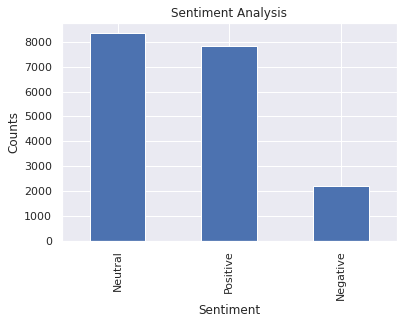

In [43]:
#Show the value counts
df [ 'Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel("Sentiment")
plt.ylabel("Counts")
sns.set_theme(style="darkgrid")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


<AxesSubplot:xlabel='Analysis', ylabel='count'>

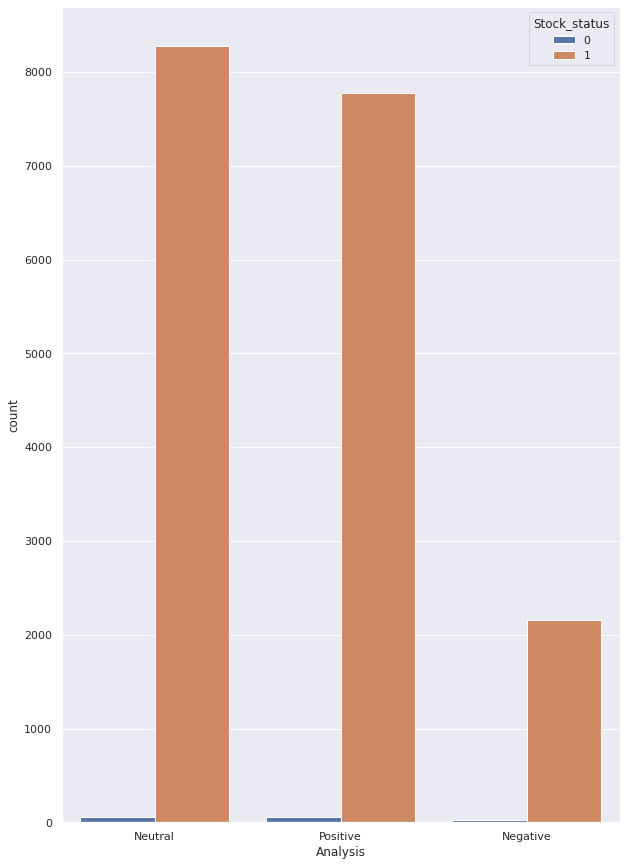

In [76]:
#plotting columns against target class
plt.figure(figsize=(10,15))
##plt.xticks(rotation=-60)
sns.set_theme(style="darkgrid")
sns.countplot(x='Analysis',hue='Stock_status',data=df)

As the plot suggests, the stock status value as 1 denotes the stock is a gainer on the given day, which seems to be having a large number of positive and nuetral tweets

compared to the negative number of tweets

In [39]:
df.columns

Index(['Unnamed: 0', 'Date', 'User', 'Tweet', 'company', 'Stock_status',
       'Tweet_punct', 'Tweet_tokenized', 'Tweet_clean', 'Subjectivity',
       'Polarity', 'Analysis'],
      dtype='object')

In [61]:
#stocks which are the bottom 10

#stock status 1 implies it is part of the top 10 and the 0 implies that the stocks are part of the bottom 10

dfloss=sortedDF[sortedDF['Stock_status']==0]
dfgain=sortedDF[sortedDF['Stock_status']==1]

<AxesSubplot:ylabel='Analysis,company'>

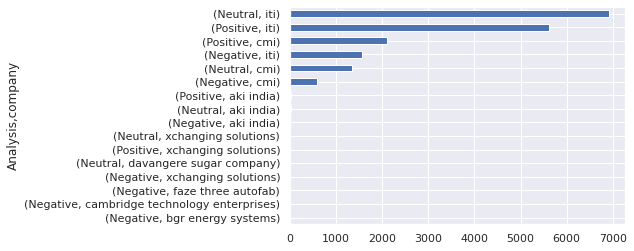

In [75]:
#plotting the relartionship between the companies and the tweet sentiments

#for the top 10 stocks

pt=dfgain[['Analysis','company']].value_counts()
pt.pt=dfgain[['Analysis','company']].value_counts()
pt.sort_values().plot(kind = 'barh')



The ItI seems to be having most tweets associated with it.

Most of them, infact the largest share of them are nuetral in nature

followed by large number of possitive tweets


<AxesSubplot:ylabel='Analysis,company'>

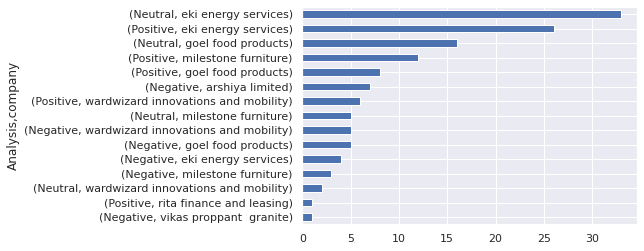

In [77]:
#plotting the relartionship between the companies and the tweet sentiments

#for the bottom 10 stocks

pt=dfloss[['Analysis','company']].value_counts()
pt.pt=dfloss[['Analysis','company']].value_counts()
pt.sort_values().plot(kind = 'barh')

Arshiya limited seems to be having largest number of negative tweets associated.